In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf # Tensorflow
from tensorflow import keras # Keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
np.set_printoptions(precision=3, suppress=True)
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [7]:
data = pd.read_csv("outputx2y2.csv")
data

,SimulationID,XStripID1,XStripID2,YStripID1,YStripID2,XStripEnergy1,XStripEnergy2,YStripEnergy1,YStripEnergy2,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
0,28.0,47.0,48.0,22.0,23.0,102.21783,426.14557,218.80093,309.56247,1.88368,-1.04090,0.50561,0.50675,0.70015,0.50298
1,32.0,13.0,14.0,5.0,6.0,73.85352,857.72750,77.82600,853.75500,-2.08372,-2.98611,-0.66661,0.73519,-0.35386,0.57818
2,78.0,18.0,19.0,27.0,28.0,169.78526,1370.32340,1047.58540,492.52313,-1.46790,-0.47462,-0.13259,-0.51682,-0.07644,0.85268
3,88.0,47.0,48.0,5.0,6.0,2092.13900,2114.43800,4198.12650,8.45061,1.93067,-3.09778,0.33001,-0.52991,0.71172,-0.46114
4,105.0,59.0,60.0,24.0,25.0,786.51044,501.96872,501.96872,786.51044,3.20796,-0.75679,0.70530,0.23056,-0.97288,-0.01888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56269,999957.0,3.0,4.0,25.0,26.0,282.61930,2599.19870,1939.51940,942.29865,-3.17232,-0.58783,0.17799,0.07495,-0.93979,0.33345
56270,999958.0,5.0,6.0,5.0,6.0,592.42920,1648.40270,1048.34170,1192.49020,-2.95146,-3.06044,0.55393,-0.71033,-0.55847,0.42842
56271,999965.0,49.0,50.0,60.0,61.0,1822.79720,1126.00320,1301.41100,1647.38940,2.16435,3.24733,0.54029,-0.18952,-0.14604,0.97096
56272,999969.0,45.0,46.0,41.0,42.0,1588.91740,603.38367,2082.95730,109.34384,1.68886,1.16812,-0.21347,-0.88896,-0.38124,0.25380


In [8]:
data = data.sample(frac=1, random_state=1) 
data

,SimulationID,XStripID1,XStripID2,YStripID1,YStripID2,XStripEnergy1,XStripEnergy2,YStripEnergy1,YStripEnergy2,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
46026,817489.0,53.0,54.0,4.0,5.0,82.59381,1310.81730,604.79364,788.61750,2.53710,-3.10948,0.51147,0.34483,-0.52541,-0.77784
19629,346612.0,45.0,46.0,29.0,30.0,2595.58400,475.28220,2439.17070,631.69550,1.68113,-0.16564,-0.66392,-0.86229,-0.44392,0.24371
600,10474.0,29.0,30.0,26.0,27.0,3220.95600,2433.06930,2510.90600,3143.11960,-0.30472,-0.67703,-0.35459,0.97489,-0.04781,0.21748
35563,632064.0,34.0,35.0,29.0,30.0,1579.47550,503.94815,1810.48300,272.94055,0.39761,-0.24616,-0.73291,-0.83310,-0.51774,0.19465
52938,940437.0,47.0,48.0,62.0,63.0,2905.63130,1184.94860,2021.85470,2068.72530,1.88176,3.68284,-0.06179,-0.76376,-0.25873,0.59138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,890155.0,32.0,33.0,48.0,49.0,2746.77780,1550.56750,2879.59330,1417.75210,0.07726,2.05121,0.19028,-0.45899,-0.86758,-0.19142
32511,577569.0,24.0,25.0,51.0,52.0,227.66476,763.01420,763.01420,227.66476,-0.86769,2.31531,0.59051,0.13048,-0.93317,0.33492
5192,91691.0,25.0,26.0,46.0,47.0,2147.23660,551.56940,692.36690,2006.43910,-0.66961,1.66153,-0.05997,-0.50712,0.78390,0.35823
12172,215325.0,45.0,46.0,20.0,21.0,3242.82500,2105.03420,1789.69120,3558.16800,1.68376,-1.19249,0.44190,-0.74963,-0.57711,-0.32405


In [9]:
2*3.7/64 #strip id length in cm
#min (0,0)
#max (number of strips * width)
#position is in cm

# 817489.0	53.0	54.0	4.0	5.0	82.59381	1310.81730	604.79364	788.61750	2.53710	-3.10948	

"""
(X+3.7) -StripID*0.1156 -3.7 is the minimum value of PositionX
(Y+3.7) -StripID*0.1156 -3.7 is the minimum value of PositionY
(X+3.7) -MinimumXStripID*0.1156
"""

'\n(X+3.7) -StripID*0.1156 -3.7 is the minimum value of PositionX\n(Y+3.7) -StripID*0.1156 -3.7 is the minimum value of PositionY\n(X+3.7) -MinimumXStripID*0.1156\n'

In [10]:
#input_features = ["XStripID1",  "YStripID1", "XStripEnergy1", "YStripEnergy1", "XStripEnergy2", "YStripEnergy2"]
input_features = ["XStripEnergy1", "YStripEnergy1", "XStripEnergy2", "YStripEnergy2"]
output_features = ["ResultPositionX", "ResultPositionY", "ResultDirectionX", "ResultDirectionY"]

In [11]:
import pandas as pd

column_names = [
    "XStripEnergy1", "YStripEnergy1", "ResultPositionX", "ResultPositionY", 
    "ResultDirectionX", "ResultDirectionY", "XStripEnergy2", "YStripEnergy2"
]

"""stats = {"min": {}, "max": {},}

for col in column_names:
    stats["min"][col] = data[col].min()
    stats["max"][col] = data[col].max()
    data[col] = (data[col]) / (data[col].max() - data[col].min())

# Convert stats to a DataFrame for better visualization
stats_df = pd.DataFrame(stats).T

print(stats_df)"""
stats = {"mean": {}, "std": {},}
for col in column_names:
    mean = data[col].mean()
    std = data[col].std()
    data[col] = (data[col] - mean) / std

    # Store mean and std for rescaling later
    stats["mean"][col] = mean
    stats["std"][col] = std

data

,SimulationID,XStripID1,XStripID2,YStripID1,YStripID2,XStripEnergy1,XStripEnergy2,YStripEnergy1,YStripEnergy2,ResultPositionX,ResultPositionY,ResultPositionZ,ResultDirectionX,ResultDirectionY,ResultDirectionZ
46026,817489.0,53.0,54.0,4.0,5.0,-1.167730,0.103575,-0.630110,-0.436914,1.145317,-1.403798,0.51147,0.604652,-0.924675,-0.77784
19629,346612.0,45.0,46.0,29.0,30.0,1.432375,-0.764455,1.270595,-0.599850,0.759995,-0.074606,-0.66392,-1.529926,-0.781241,0.24371
600,10474.0,29.0,30.0,26.0,27.0,2.079426,1.269473,1.344924,2.007821,-0.133953,-0.305507,-0.35459,1.718801,-0.084031,0.21748
35563,632064.0,34.0,35.0,29.0,30.0,0.381042,-0.734674,0.619175,-0.972354,0.182207,-0.110962,-0.73291,-1.478309,-0.911175,0.19465
52938,940437.0,47.0,48.0,62.0,63.0,1.753170,-0.027189,0.838189,0.892252,0.850310,1.663047,-0.06179,-1.355693,-0.455281,0.59138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,890155.0,32.0,33.0,48.0,49.0,1.588810,0.352649,1.726942,0.216331,0.037999,0.926339,0.19028,-0.816762,-1.526943,-0.19142
32511,577569.0,24.0,25.0,51.0,52.0,-1.017630,-0.465533,-0.466169,-1.019364,-0.387379,1.045584,0.59051,0.225612,-1.642391,0.33492
5192,91691.0,25.0,26.0,46.0,47.0,0.968485,-0.685201,-0.539371,0.827579,-0.298211,0.750392,-0.05997,-0.901871,1.379896,0.35823
12172,215325.0,45.0,46.0,20.0,21.0,2.102053,0.928680,0.597631,2.438775,0.761179,-0.538245,0.44190,-1.330707,-1.015675,-0.32405


In [12]:
test_set = data[:4000]
data = data[4000:]
X = data[input_features]
y = data[output_features]
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.25, random_state=6)

In [13]:
type(X_train["YStripEnergy1"])

pandas.core.series.Series

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define input shape (assuming 'n_features' input features)
n_features = 4  # Change according to actual number of input variables

hidden_layers = [20, 20]  # Example: if self.Layout = "30,20,10"

model = keras.Sequential()
model.add(layers.Input(shape=(n_features,)))  # Input layer

l2_lambda = 5e-3

# Hidden layers with sigmoid activation
for units in hidden_layers:
    model.add(layers.Dense(units, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    layers.Dropout(0.1)


n_outputs = 4 #
model.add(layers.Dense(n_outputs, activation='linear')) 


learning_rate = 0.01; 
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=1000,
    decay_rate=0.04
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.9)   
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])


model.summary()

# Training setup
batch_size = int(0.256*1000)  
epochs = 10000  
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, min_delta=1e-6)

# Assuming X_train, y_train, X_val, y_val are prepared



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604 (2.36 KB)

 Trainable params: 604 (2.36 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_dev, y_dev),
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/10000
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0671 - mse: 0.9913 - val_loss: 0.9809 - val_mse: 0.9719
Epoch 2/10000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.9789 - mse: 0.9720 - val_loss: 0.9768 - val_mse: 0.9727
Epoch 3/10000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.9747 - mse: 0.9706 - val_loss: 0.9757 - val_mse: 0.9721
Epoch 4/10000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.9757 - mse: 0.9721 - val_loss: 0.9747 - val_mse: 0.9711
Epoch 5/10000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.9770 - mse: 0.9735 - val_loss: 0.9750 - val_mse: 0.9716
Epoch 6/10000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.9790 - mse: 0.9756 - val_loss: 0.9746 - val_mse: 0.9713
Epoch 7/10000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.9775 - mse: 0.9741 - val_loss: 0.9747 - val_mse: 0.9715
Epoch 8/10000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.9734 - mse: 0.9702 - val_loss: 0.9746 - val_mse: 0.9713
Epoch 9/10000
154/

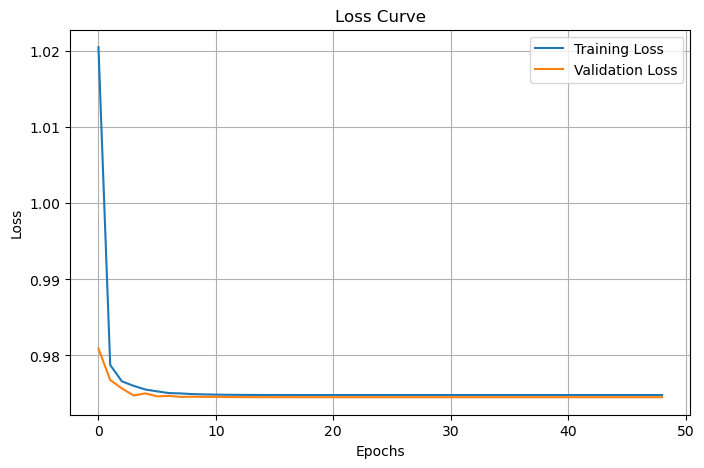

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

0.9745118618011475


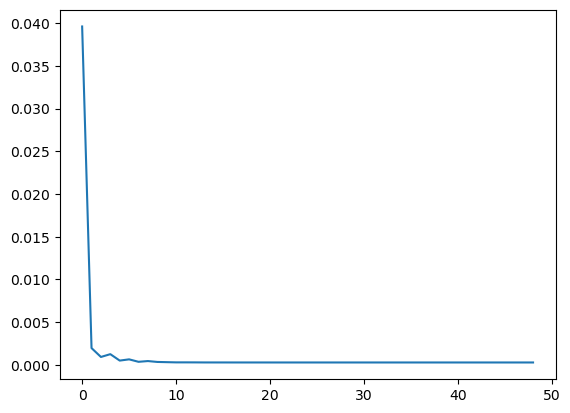

In [17]:
plt.plot(np.array(history.history['loss']) - np.array(history.history['val_loss']))
min(np.array(history.history['loss']) - np.array(history.history['val_loss']))
print(min(history.history['val_loss']))

In [18]:
X_test = test_set[input_features]
y_test = test_set[output_features]
predictions = model.predict(X_test)

# Assuming y_test is a Pandas DataFrame
rescaled_y_test = y_test.copy()  # Create a copy to avoid modifying the original

for col in output_features:
    mean = stats["mean"][col]
    std = stats["std"][col]
    rescaled_y_test[col] = (y_test[col] * std) + mean

# Now, use rescaled_y_test for comparisons

rescaled_y_test


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY
46026,2.53710,-3.10948,0.34483,-0.52541
19629,1.68113,-0.16564,-0.86229,-0.44392
600,-0.30472,-0.67703,0.97489,-0.04781
35563,0.39761,-0.24616,-0.83310,-0.51774
52938,1.88176,3.68284,-0.76376,-0.25873
...,...,...,...,...
12008,0.22846,-2.25340,0.72015,-0.33067
46220,-0.25776,-1.92239,-0.53215,0.48845
51766,1.50910,0.91505,0.52652,0.67986
20564,1.07890,-0.95117,0.53749,0.35813


In [19]:
n_output_features = predictions.shape[1]

# Get the column names for the output features
output_feature_names = output_features  # or  column_names[-n_outputs:]

# Create an empty array to store the rescaled predictions
rescaled_predictions = np.zeros_like(predictions)

# Rescale each output featureren
for i in range(n_output_features):
    feature_name = output_feature_names[i]
    mean = stats["mean"][feature_name]
    std = stats["std"][feature_name]
    rescaled_predictions[:, i] = predictions[:, i] * std + mean

# Convert the rescaled predictions to a Pandas DataFrame (optional, but helpful)
rescaled_predictions_df = pd.DataFrame(rescaled_predictions, columns=output_feature_names)

# Print or use the rescaled predictions
rescaled_predictions_df
rescaled_predictions_df

,ResultPositionX,ResultPositionY,ResultDirectionX,ResultDirectionY
0,-0.002159,-0.012110,0.113369,0.019332
1,-0.025396,-0.013122,-0.187339,-0.160193
2,0.008277,-0.005810,-0.081271,0.063714
3,-0.023784,-0.015676,-0.095347,-0.144699
4,-0.007175,-0.001234,-0.162259,0.004866
...,...,...,...,...
3995,-0.003246,-0.014182,0.121663,0.003516
3996,-0.009225,0.011919,-0.158838,0.076705
3997,-0.002129,0.027505,-0.208513,0.192969
3998,-0.006265,-0.001761,0.049977,0.050228


In [20]:
x_diff = np.array(rescaled_y_test["ResultPositionX"]) -  np.array((rescaled_predictions_df["ResultPositionX"]))
y_diff = np.array(rescaled_y_test["ResultPositionY"]) -  np.array((rescaled_predictions_df["ResultPositionY"]))
print(np.mean(y_diff**2))
diff_distance = np.sqrt(x_diff**2 + y_diff**2)
np.mean(diff_distance)

4.860608121968636


2.944425464508234

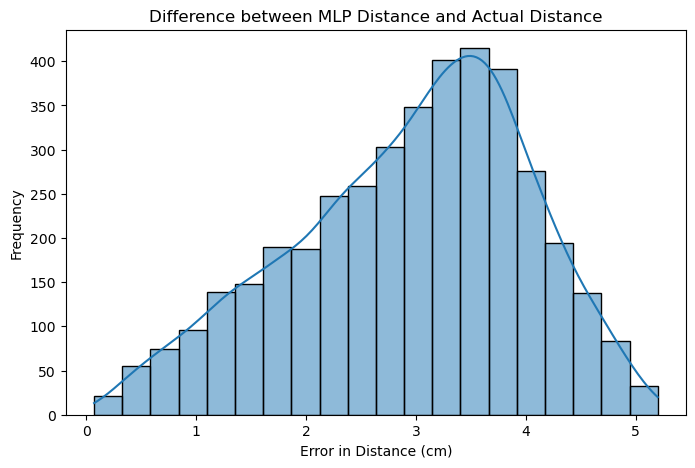

2.944425464508234
1.065517060843408


In [21]:
import seaborn as sns

# Example: Simulate skewed data (replace with your actual dataset)
data = diff_distance # Example skewed data

# Apply log transformation if data is heavily skewed


# Plot the histogram and KDE
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=20, kde=True)  # kde=True adds a smoothed curve
plt.xlabel("Error in Distance (cm)")
plt.ylabel("Frequency")
plt.title("Difference between MLP Distance and Actual Distance")
plt.show()
print(np.mean(data))
print(np.std(data))

-66.43998858222767 0.0


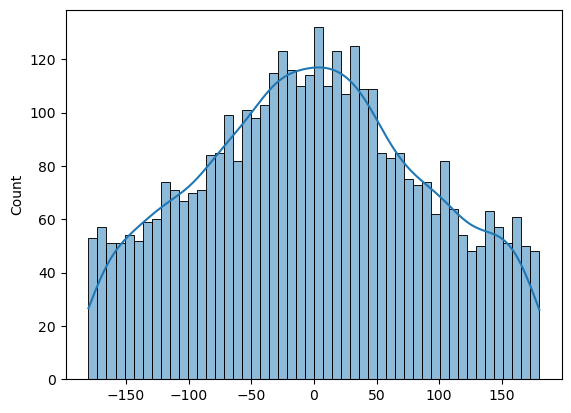

In [22]:
import random
import seaborn as sns
pred_d_x = np.array(rescaled_predictions_df["ResultDirectionX"])
actual_d_x = np.array(rescaled_y_test["ResultDirectionX"])

pred_d_y = np.array(rescaled_predictions_df["ResultDirectionY"])
actual_d_y = np.array(rescaled_y_test["ResultDirectionY"])

dot_product = pred_d_x * actual_d_x + pred_d_y * actual_d_y
Mag1 = np.sqrt(pred_d_x**2 + pred_d_y**2)
Mag2 = np.sqrt(actual_d_x**2 + actual_d_y**2)

# Loop through each direction value and multiply by a random choice from [-1, 1]
directions = []
for i in range(len(pred_d_x)):
    direction = np.degrees(np.arccos(dot_product[i] / (Mag1[i] * Mag2[i]))) * random.choice([-1,1])
    directions.append(direction) 

# Plot the histogram
sns.histplot(np.array(directions), bins=50, kde=True)
print(np.mean(direction), np.std(direction))